In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [2]:
df = pd.read_csv('healthinsurance.csv')
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [3]:
df.shape

(15000, 13)

In [4]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [5]:
df['smoker'] = df['smoker'].astype('object')

df['diabetes'] = df['diabetes'].astype('object')

df['regular_ex'] = df['regular_ex'].astype('object')

In [6]:
df_cat = df.select_dtypes('O')
df_cat.columns

Index(['sex', 'hereditary_diseases', 'smoker', 'city', 'diabetes',
       'regular_ex', 'job_title'],
      dtype='object')

In [7]:
df_num = df.select_dtypes(np.number)

df_num.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

In [8]:
df.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,68.650133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,71.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


In [9]:
df.describe(include = 'object')

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


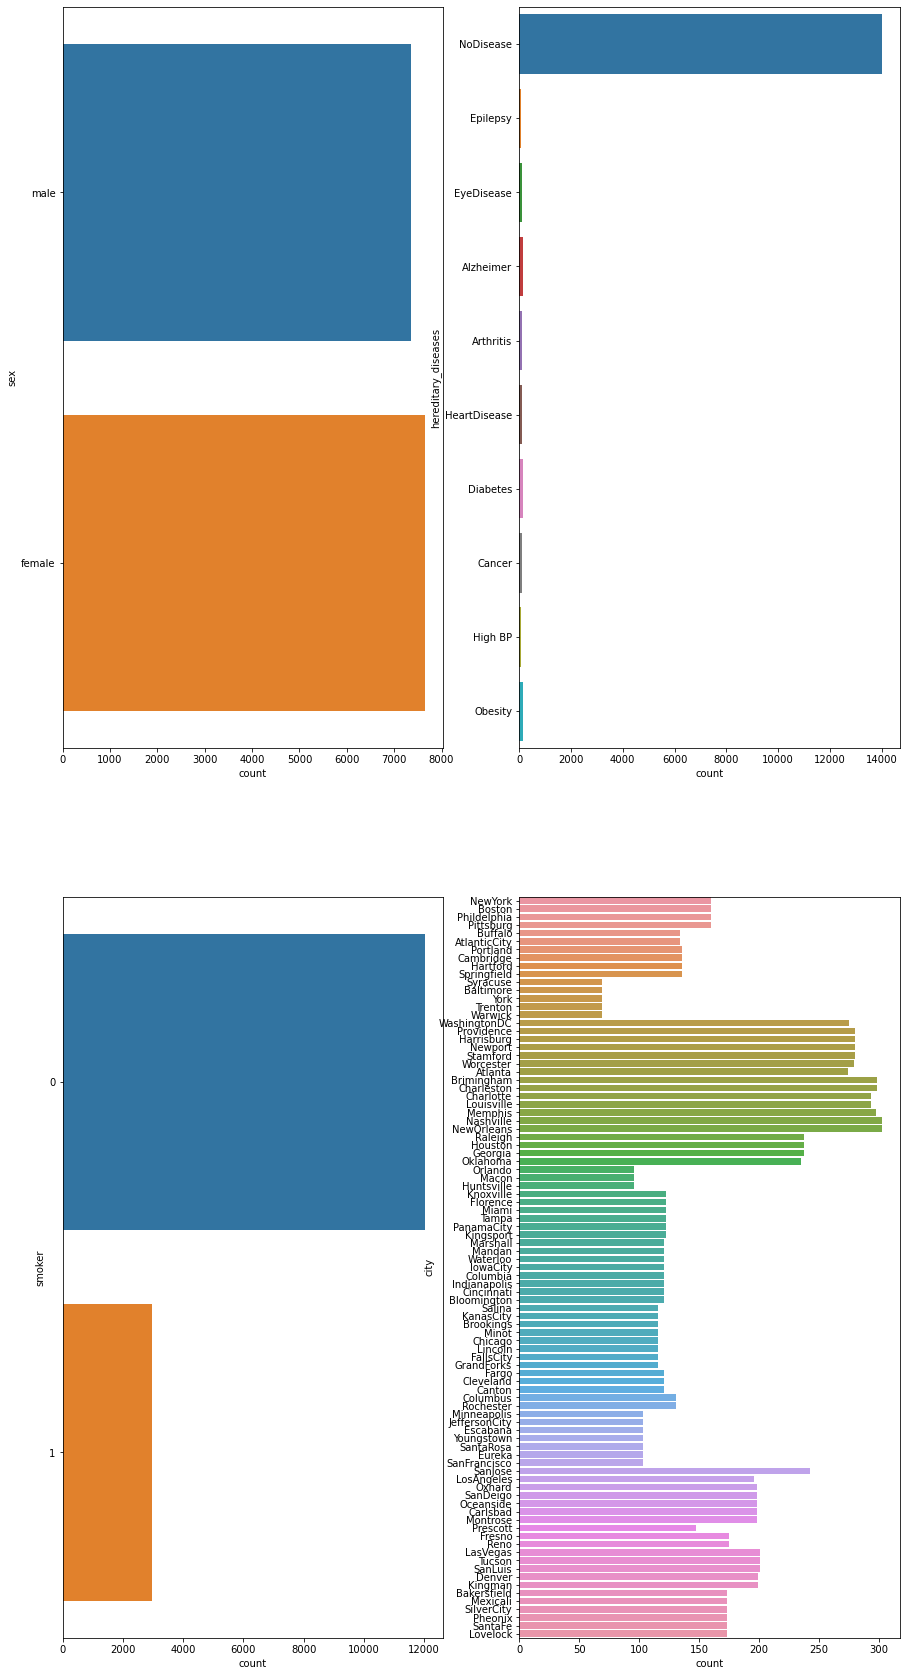

In [10]:
fig,ax = plt.subplots(nrows = 2,ncols = 2, figsize = (15,30))

for i,j in zip(df_cat.columns,ax.flatten()):
    sns.countplot(y = df_cat[i],ax = j)
plt.show()

In [11]:
df_cat['sex'].value_counts()/len(df) * 100

female    51.013333
male      48.986667
Name: sex, dtype: float64

In [12]:
df_cat['hereditary_diseases'].value_counts()/len(df) * 100

NoDisease       93.320000
Diabetes         0.986667
Alzheimer        0.960000
Obesity          0.906667
EyeDisease       0.820000
Cancer           0.726667
Arthritis        0.640000
HeartDisease     0.620000
Epilepsy         0.560000
High BP          0.460000
Name: hereditary_diseases, dtype: float64

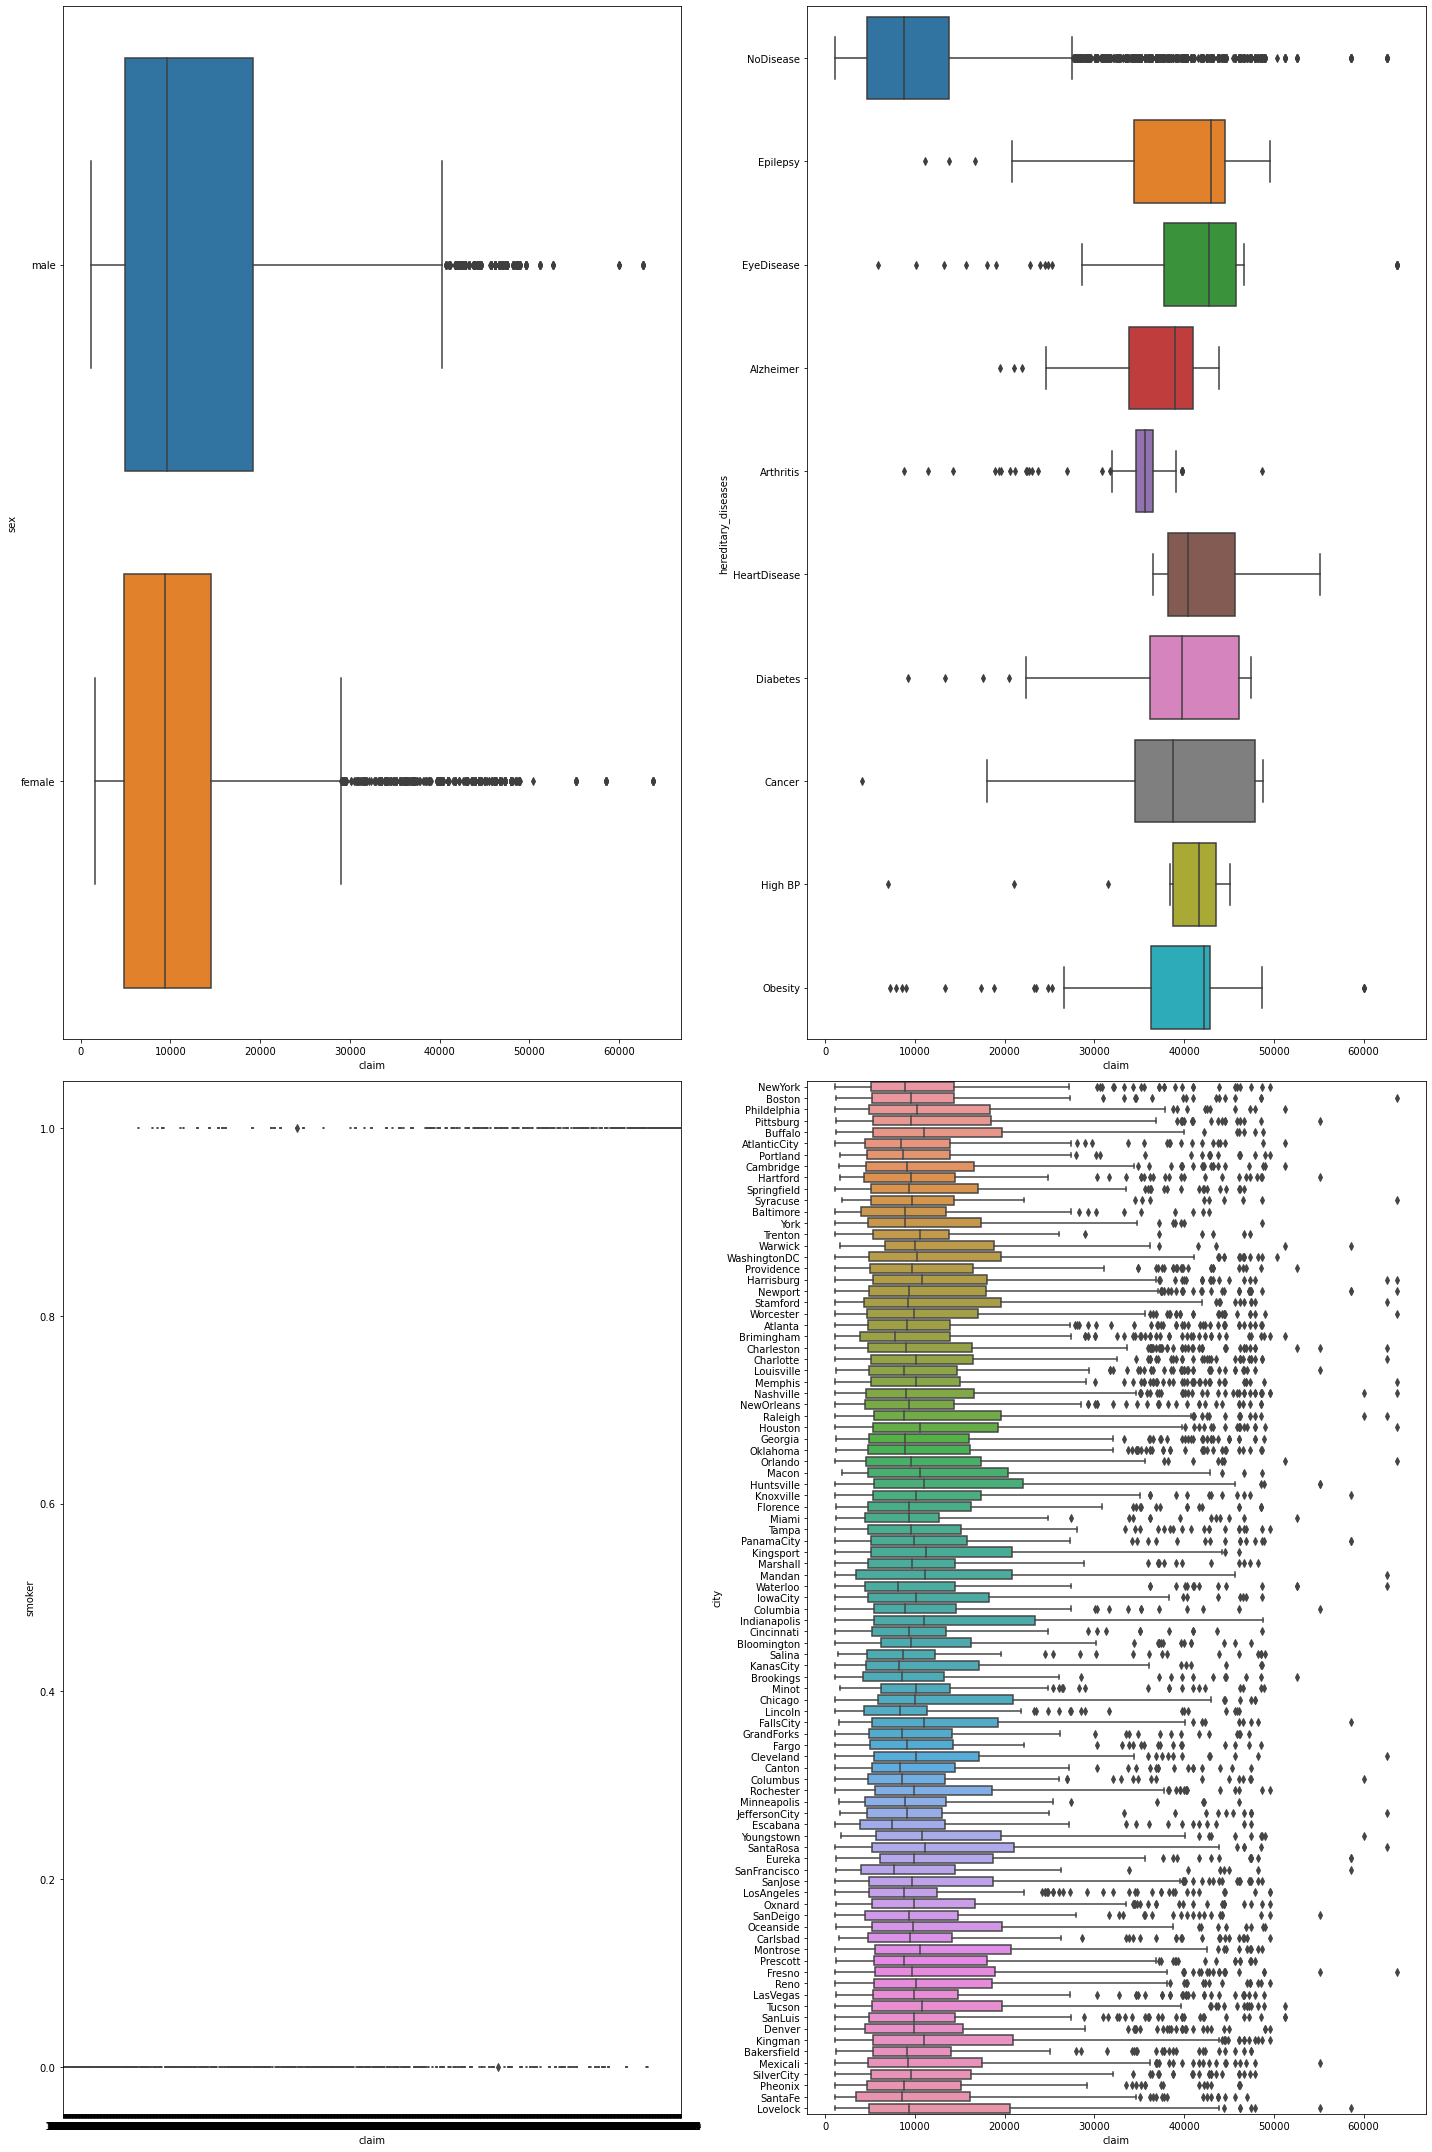

In [13]:
fig,ax = plt.subplots(nrows = 2,ncols = 2, figsize = (20,30))

for i,j in zip(df_cat.columns,ax.flatten()):
    sns.boxplot(y = df_cat[i],x = df['claim'],ax = j)
plt.tight_layout()
plt.show()

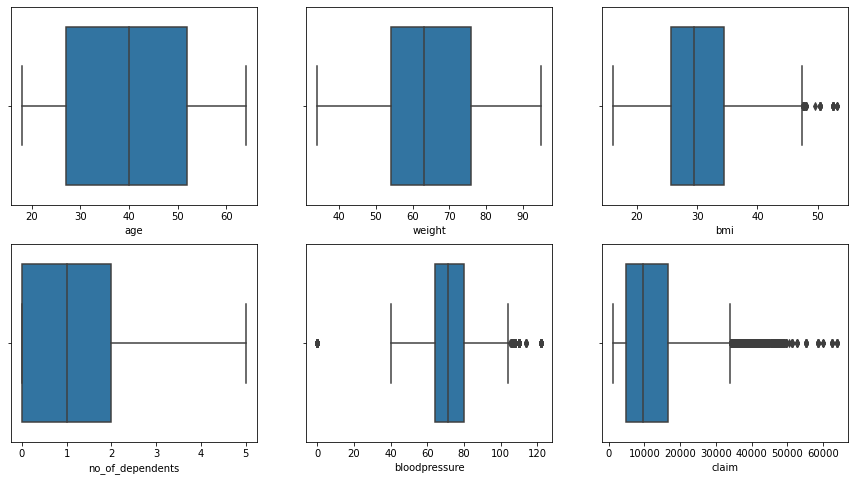

In [14]:
#checkig null values

fig,ax = plt.subplots(nrows = 2,ncols = 3, figsize = (15,8))

for i,j in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax = j)
plt.show()

In [15]:
#iqr

q1 = df_num.quantile(0.25)

q3 = df_num.quantile(0.75)

iqr = q3 - q1


df = df[~((df < ( q1 - 1.5* iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]

df.shape

(12539, 13)

In [16]:
#checking null

df.isnull().sum()

age                    353
sex                      0
weight                   0
bmi                    787
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [17]:
df.isnull().sum()/len(df) * 100

age                    2.815217
sex                    0.000000
weight                 0.000000
bmi                    6.276418
hereditary_diseases    0.000000
no_of_dependents       0.000000
smoker                 0.000000
city                   0.000000
bloodpressure          0.000000
diabetes               0.000000
regular_ex             0.000000
job_title              0.000000
claim                  0.000000
dtype: float64

In [18]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = 'median').fit_transform(df_num.values)

df_num = pd.DataFrame(si,index = df_num.index,columns = df_num.columns)

df_num.isnull().sum()

age                 0
weight              0
bmi                 0
no_of_dependents    0
bloodpressure       0
claim               0
dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit_transform(df_num.values)

df_num = pd.DataFrame(ss,index = df_num.index,columns = df_num.columns)

df_num.describe()



,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,1.922018e-16,2.032596e-16,-3.043269e-16,2.341238e-16,4.227137e-16,-4.575599e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.558955e+00,-2.255932e+00,-2.397224e+00,-9.196576e-01,-3.535410e+00,-1.010842e+00
25%,-9.081692e-01,-7.962353e-01,-7.272362e-01,-9.196576e-01,-2.394770e-01,-7.042027e-01
50%,3.185476e-02,-1.393718e-01,-1.368366e-01,-1.056092e-01,1.210157e-01,-3.174053e-01
75%,8.272597e-01,8.094309e-01,6.559857e-01,7.084392e-01,5.845063e-01,2.566455e-01
max,1.767284e+00,2.196143e+00,3.861012e+00,3.150584e+00,2.747463e+00,4.146333e+00


In [20]:
df = pd.concat([df_num,df_cat],axis = 1)
df.isnull().sum()

age                    0
weight                 0
bmi                    0
no_of_dependents       0
bloodpressure          0
claim                  0
sex                    0
hereditary_diseases    0
smoker                 0
city                   0
diabetes               0
regular_ex             0
job_title              0
dtype: int64

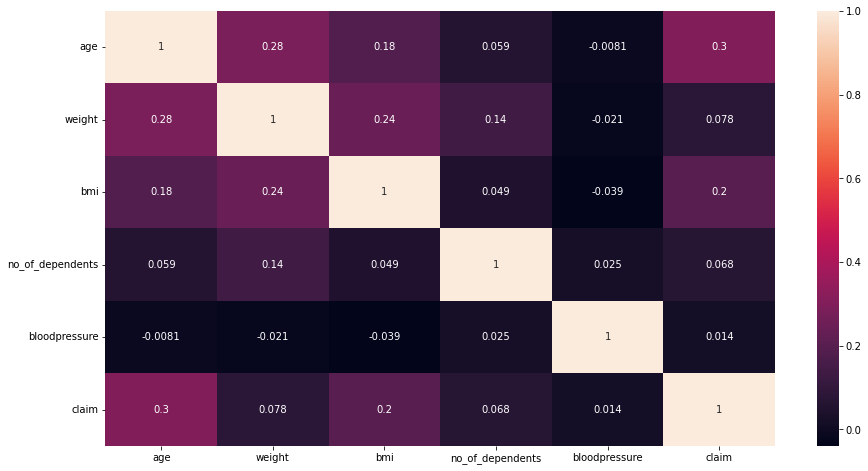

In [21]:
plt.figure(figsize = (15,8))

sns.heatmap(df.corr(),annot = True)

plt.show()

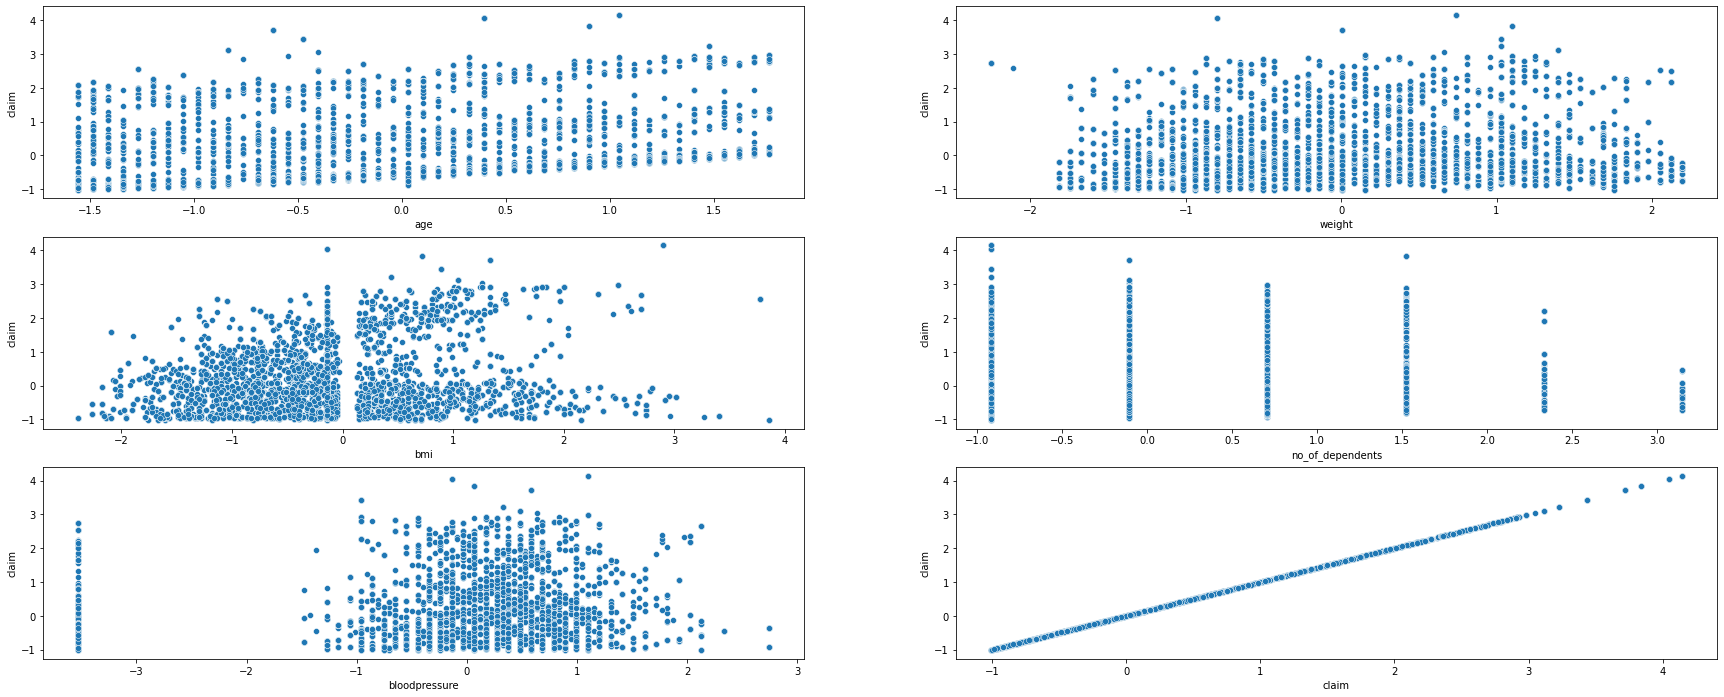

In [45]:
fig,ax = plt.subplots(nrows = 3,ncols = 2, figsize = (30,12))
df_num = df.select_dtypes(np.number)
for i,j in zip(df_num.columns,ax.flatten()):
    sns.scatterplot(df_num[i],df['claim'],ax = j)
    

plt.show()

In [23]:
x = df.drop('claim',axis = 1)
y = df['claim']

x = pd.get_dummies(x,drop_first = True)

import statsmodels.api as sm

x = sm.add_constant(x)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size  = 0.3 )

In [24]:
from scipy.stats import ttest_ind

ttest_ind(x_train,x_test)

Ttest_indResult(statistic=array([        nan, -0.55190612,  0.2915313 , -0.61919836, -1.06167937,
       -1.00691744,  0.76270601, -0.7149528 ,  0.77614398,  0.79313202,
       -1.62363451,  0.37536384,  1.33920914,  0.18430477, -0.25688789,
        0.52629806, -0.37546308,  0.60591661, -0.35041154, -1.39553939,
        1.65327513,  0.34686607,  0.68946358,  0.16270787,  0.03786933,
       -1.72942149,  1.25484712, -0.40587282, -2.24748331, -1.81542368,
       -0.04067694,  1.25484712,  1.05564884, -0.73694836, -2.81554568,
       -0.98104616, -0.237319  ,  1.05718567, -0.65084012,  2.05175564,
        0.3173776 , -0.41479466,  1.30020374, -0.04067694, -0.1316359 ,
        1.65421522,  0.15715876, -0.26810337,  0.45809795,  0.65727583,
       -1.31611524,  2.19690777,  1.35481746, -1.26957436, -0.87280764,
        0.8212558 , -0.44744925, -0.03137758,  0.11586543, -0.6841447 ,
       -0.7149528 ,  0.0597515 , -0.33859306,  0.01278868,  1.81899594,
        1.11086358,  1.27295918,  1.17

In [25]:
ttest_ind(y_train,y_test)

Ttest_indResult(statistic=-1.0733705252246712, pvalue=0.2831221730009975)

In [26]:
model = sm.OLS(y_train,x_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     250.7
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:53:33   Log-Likelihood:                -7074.3
No. Observations:               10500   AIC:                         1.443e+04
Df Residuals:                   10357   BIC:                         1.547e+04
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.4156      0.070      5.896      0.000       0.277       0.554
age                                  0.3042      0.005     57.525      0.000       0.294       0.315
weight                              -0.0365      0.005     -6.970      0.000      -0.047      -0.026
bmi                                  0.0972      0.005     19.304      0.000       0.087       0.107
no_of_dependents                     0.0480      0.005      9.888      0.000       0.038       0.058
bloodpressure                        0.0052      0.005      1.098      0.272      -0.004       0.015
sex_male                            -0.0104      0.010     -1.064      0.287      -0.030       0.009
hereditary_diseases_Arthritis       -0.2193      0.079     -2.791      0.005      -0.373      -0.065
hereditary_diseases_Cancer           0.0964      0.074      1.303      0.192      -0.049       0.241
hereditary_diseases_Diabetes        -0.1084      0.068     -1.596      0.111      -0.242       0.025
hereditary_diseases_Epilepsy        -0.0178      0.084     -0.212      0.832      -0.182       0.147
hereditary_diseases_EyeDisease      -0.0293      0.072     -0.405      0.686      -0.171       0.113
hereditary_diseases_HeartDisease     0.3794      0.077      4.945      0.000       0.229       0.530
hereditary_diseases_High BP         -0.2031      0.086     -2.365      0.018      -0.371      -0.035
hereditary_diseases_NoDisease       -0.9317      0.051    -18.224      0.000      -1.032      -0.831
hereditary_diseases_Obesity         -0.0506      0.070     -0.725      0.468      -0.187       0.086
smoker_1                             1.6690      0.014    119.880      0.000       1.642       1.696
city_AtlanticCity                    0.0328      0.060      0.547      0.584      -0.085       0.150
city_Bakersfield                    -0.0210      0.056     -0.375      0.708      -0.131       0.089
city_Baltimore                      -0.0636      0.081     -0.786      0.432      -0.222       0.095
city_Bloomington                    -0.0133      0.061     -0.219      0.827      -0.132       0.106
city_Boston                         -0.0223      0.057     -0.393      0.694      -0.134       0.089
city_Brimingham                      0.0516      0.048      1.077      0.281      -0.042       0.145
city_Brookings                       0.0582      0.063      0.919      0.358      -0.066       0.182
city_Buffalo                         0.1027      0.060      1.699      0.089      -0.016       0.221
city_Cambridge                       0.0963      0.062      1.545      0.122      -0.026       0.218
city_Canton                         -0.0215      0.061     -0.351      0.725      -0.141       0.098
city_Carlsbad                       -0.0836      0.05

In [27]:
from sklearn.metrics import mean_squared_error


y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(rmse_train)
print(rmse_test)

0.4746396418111712
0.5054689101844602


In [28]:
#checking multi collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif_factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

vif['features'] = x.columns


sorted_ = vif.sort_values('vif_factor',ascending = False)

sorted_.head()

,vif_factor,features
0,221.711589,const
14,7.048651,hereditary_diseases_NoDisease
141,5.053200,job_title_Student
130,3.979989,job_title_HomeMakers
140,3.317843,job_title_Singer


In [29]:
x_multi = x.drop(['hereditary_diseases_NoDisease','job_title_Student'],axis = 1)


x_train_multi,x_test_multi,y_train,y_test = train_test_split(x_multi,y,test_size = 0.3)


model_multi = sm.OLS(y_train,x_train_multi).fit()

model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:54:01   Log-Likelihood:                -7339.2
No. Observations:               10500   AIC:                         1.496e+04
Df Residuals:                   10359   BIC:                         1.598e+04
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.4406      0.040    -11.130      0.000      -0.518      -0.363
age                                  0.3015      0.005     56.158      0.000       0.291       0.312
weight                              -0.0401      0.005     -7.461      0.000      -0.051      -0.030
bmi                                  0.0991      0.005     19.114      0.000       0.089       0.109
no_of_dependents                     0.0439      0.005      8.865      0.000       0.034       0.054
bloodpressure                        0.0110      0.005      2.245      0.025       0.001       0.021
sex_male                            -0.0114      0.010     -1.141      0.254      -0.031       0.008
hereditary_diseases_Arthritis        0.7066      0.064     11.065      0.000       0.581       0.832
hereditary_diseases_Cancer           0.9710      0.056     17.429      0.000       0.862       1.080
hereditary_diseases_Diabetes         0.8152      0.056     14.609      0.000       0.706       0.925
hereditary_diseases_Epilepsy         0.8789      0.066     13.378      0.000       0.750       1.008
hereditary_diseases_EyeDisease       0.8754      0.053     16.577      0.000       0.772       0.979
hereditary_diseases_HeartDisease     1.2612      0.064     19.765      0.000       1.136       1.386
hereditary_diseases_High BP          0.7309      0.077      9.552      0.000       0.581       0.881
hereditary_diseases_Obesity          0.8627      0.053     16.347      0.000       0.759       0.966
smoker_1                             1.6964      0.014    122.083      0.000       1.669       1.724
city_AtlanticCity                   -0.0191      0.061     -0.313      0.754      -0.138       0.100
city_Bakersfield                    -0.0058      0.056     -0.103      0.918      -0.116       0.105
city_Baltimore                       0.0270      0.084      0.319      0.749      -0.139       0.192
city_Bloomington                    -0.0230      0.063     -0.366      0.714      -0.146       0.100
city_Boston                          0.0121      0.059      0.205      0.838      -0.104       0.128
city_Brimingham                      0.0692      0.049      1.403      0.161      -0.027       0.166
city_Brookings                      -0.0021      0.065     -0.032      0.974      -0.130       0.126
city_Buffalo                         0.0688      0.060      1.144      0.253      -0.049       0.187
city_Cambridge                       0.0919      0.061      1.494      0.135      -0.029       0.212
city_Canton                         -0.0355      0.063     -0.564      0.573      -0.159       0.088
city_Carlsbad                       -0.0348      0.055     -0.628      0.530      -0.143       0.074
city_Charleston                      0.0428      0.04

In [30]:
from sklearn.metrics import mean_squared_error

y_pred_train = model_multi.predict(x_train_multi)
y_pred_test = model_multi.predict(x_test_multi)

mse_train_multi = mean_squared_error(y_train,y_pred_train)



rmse_train_multi = np.sqrt(mse_train_multi)
print(rmse_train_multi)

mse_test_multi = mean_squared_error(y_test,y_pred_test)


rmse_test_multi = np.sqrt(mse_test_multi)
print(rmse_test_multi)

0.4867678970620515
0.5040054879413292


In [31]:
p_vals = pd.DataFrame(model_multi.pvalues,columns = ['PVALUE'])
significant = p_vals[p_vals['PVALUE'] < 0.05 ]

signi = significant.index.to_list()
signi

['const',
 'age',
 'weight',
 'bmi',
 'no_of_dependents',
 'bloodpressure',
 'hereditary_diseases_Arthritis',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Diabetes',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_EyeDisease',
 'hereditary_diseases_HeartDisease',
 'hereditary_diseases_High BP',
 'hereditary_diseases_Obesity',
 'smoker_1',
 'city_Chicago',
 'city_Eureka',
 'city_Lovelock',
 'city_Minneapolis',
 'city_Montrose',
 'city_Raleigh',
 'city_Warwick',
 'city_Waterloo',
 'diabetes_1',
 'regular_ex_1',
 'job_title_Actor',
 'job_title_Analyst',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Chef',
 'job_title_Dancer',
 'job_title_DefencePersonnels',
 'job_title_Engineer',
 'job_title_FilmDirector',
 'job_title_GovEmployee',
 'job_title_HouseKeeper',
 'job_title_Technician']

In [32]:
x_final = x[signi]

x_final = sm.add_constant(x_final)

x_train_final,x_test_final,y_train,y_test = train_test_split(x_final,y,test_size = 0.3)



In [33]:
model_final = sm.OLS(y_train,x_train_final).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     896.7
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:54:02   Log-Likelihood:                -7588.9
No. Observations:               10500   AIC:                         1.525e+04
Df Residuals:                   10463   BIC:                         1.552e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.4460      0.011    -38.788      0.000      -0.469      -0.423
age                                  0.2991      0.005     57.909      0.000       0.289       0.309
weight                              -0.0419      0.005     -7.930      0.000      -0.052      -0.032
bmi                                  0.1085      0.005     20.834      0.000       0.098       0.119
no_of_dependents                     0.0482      0.005      9.679      0.000       0.038       0.058
bloodpressure                        0.0093      0.005      1.874      0.061      -0.000       0.019
hereditary_diseases_Arthritis        0.6908      0.060     11.423      0.000       0.572       0.809
hereditary_diseases_Cancer           0.8935      0.058     15.287      0.000       0.779       1.008
hereditary_diseases_Diabetes         0.7912      0.052     15.159      0.000       0.689       0.894
hereditary_diseases_Epilepsy         0.8450      0.065     12.901      0.000       0.717       0.973
hereditary_diseases_EyeDisease       0.9033      0.055     16.513      0.000       0.796       1.011
hereditary_diseases_HeartDisease     1.2214      0.061     20.047      0.000       1.102       1.341
hereditary_diseases_High BP          0.7605      0.071     10.758      0.000       0.622       0.899
hereditary_diseases_Obesity          0.8254      0.052     15.755      0.000       0.723       0.928
smoker_1                             1.6908      0.014    121.319      0.000       1.664       1.718
city_Chicago                         0.1262      0.055      2.290      0.022       0.018       0.234
city_Eureka                          0.1015      0.059      1.714      0.087      -0.015       0.218
city_Lovelock                        0.1577      0.048      3.321      0.001       0.065       0.251
city_Minneapolis                    -0.1478      0.058     -2.533      0.011      -0.262      -0.033
city_Montrose                        0.1192      0.041      2.890      0.004       0.038       0.200
city_Raleigh                         0.0482      0.039      1.227      0.220      -0.029       0.125
city_Warwick                         0.1810      0.076      2.369      0.018       0.031       0.331
city_Waterloo                        0.0880      0.055      1.588      0.112      -0.021       0.197
diabetes_1                           0.1205      0.012     10.141      0.000       0.097       0.144
regular_ex_1                        -0.0657      0.012     -5.585      0.000      -0.089      -0.043
job_title_Actor                     -0.0720      0.023     -3.120      0.002      -0.117      -0.027
job_title_Analyst                   -0.1839      0.038     -4.845      0.000      -0.258      -0.110
job_title_Beautician                -0.0538      0.03

In [34]:
from sklearn.metrics import mean_squared_error

y_pred_train = model_final.predict(x_train_final)
y_pred_test = model_final.predict(x_test_final)

mse_train_final = mean_squared_error(y_train,y_pred_train)



rmse_train_final = np.sqrt(mse_train_final)
print(rmse_train_final)

mse_test_final = mean_squared_error(y_test,y_pred_test)


rmse_test_final = np.sqrt(mse_test_final)
print(rmse_test_final)

0.49848165512130577
0.4825352539789972


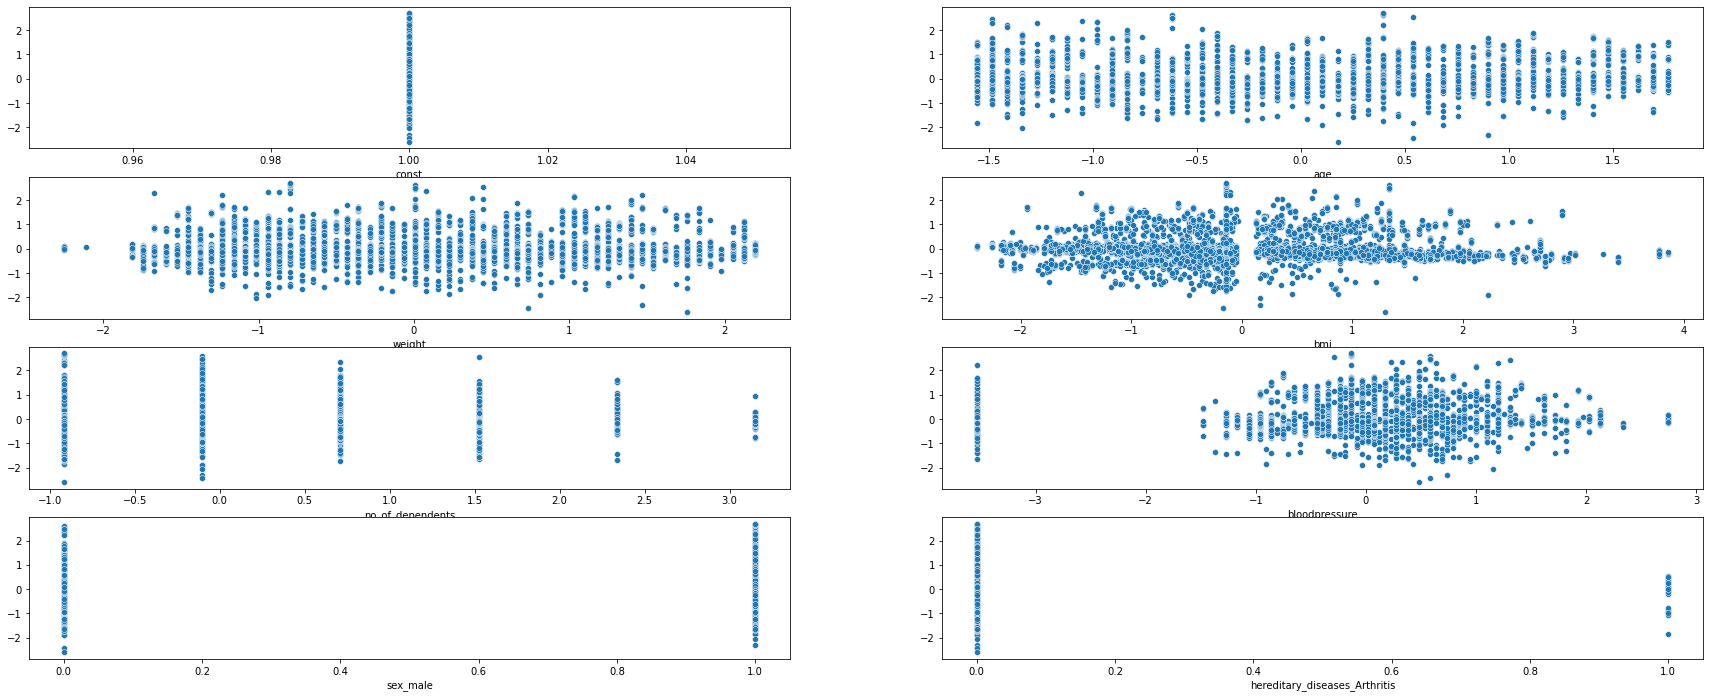

In [35]:
fig,ax = plt.subplots(nrows = 4,ncols = 2, figsize = (30,12))

for i,j in zip(x.columns,ax.flatten()):
    sns.scatterplot(x[i],model.resid,ax = j)
    

plt.show()

<AxesSubplot:>

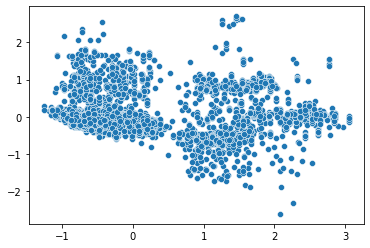

In [36]:
sns.scatterplot(model_final.fittedvalues,model.resid)

In [37]:
import statsmodels as sm

sm.stats.diagnostic.linear_rainbow(model_final)

(1.0412244006041418, 0.07204128664312533)

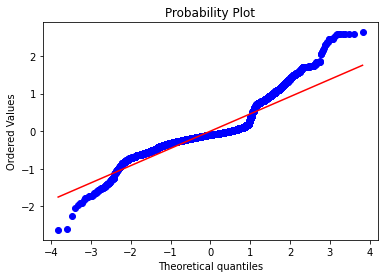

In [38]:
from scipy.stats import probplot

probplot(model_final.resid,plot = plt)

plt.show()

In [39]:
from scipy.stats import shapiro
shapiro(model_final.resid)

ShapiroResult(statistic=0.8453150391578674, pvalue=0.0)

In [40]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model_final.resid)

1.9756006583296069

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

scores = cross_val_score(estimator = LinearRegression(),X = x_test_final,y = y_test,cv = 5,scoring = 'r2')

print(min(scores))
print(max(scores))
print(np.mean(scores))

0.7232299452170672
0.7824889115222733
0.7564909695267765


In [42]:
model_final.f_pvalue < 0.05

#Model Significant

True

In [43]:
model_final.resid.skew()

1.306946235359808